In [1]:
# 卷积神经网络 LeNet
''' 
通过之前⼏节，我们学习了构建⼀个完整卷积神经⽹络的所需组件。回想⼀下，之前我们将softmax回归模型
（3.6节）和多层感知机模型（4.2节）应⽤于Fashion-MNIST数据集中的服装图⽚。为了能够应⽤softmax回归
和多层感知机，我们⾸先将每个⼤⼩为28 × 28的图像展平(展平方式: 一行接一行)为⼀个784维的固定⻓度的⼀维向量，然后⽤全连
接层对其进⾏处理。⽽现在，我们已经掌握了卷积层的处理⽅法，我们可以在图像中保留空间结构。同时，⽤
卷积层代替全连接层的另⼀个好处是：模型更简洁、所需的参数更少。

在本节中，我们将介绍LeNet，它是最早发布的卷积神经⽹络之⼀，因其在计算机视觉任务中的⾼效性能⽽
受到⼴泛关注。这个模型是由AT&T⻉尔实验室的研究员Yann LeCun在1989年提出的（并以其命名），⽬的是
识别图像 [LeCun et al., 1998]中的⼿写数字。当时，Yann LeCun发表了第⼀篇通过反向传播成功训练卷积神
经⽹络的研究，这项⼯作代表了⼗多年来神经⽹络研究开发的成果。

当时，LeNet取得了与⽀持向量机（support vector machines）性能相媲美的成果，成为监督学习的主流⽅
法。LeNet被⼴泛⽤于⾃动取款机（ATM）机中，帮助识别处理⽀票的数字。时⾄今⽇，⼀些⾃动取款机仍
在运⾏Yann LeCun和他的同事Leon Bottou在上世纪90年代写的代码呢！
'''
import torch
from torch import nn
from d2l import torch as d2l


In [2]:
# LeNet-5 两个卷积块,三个全连接层
# 每个卷积块中的基本单元是⼀个卷积层、⼀个sigmoid激活函数和平均汇聚层
''' 
总体来看，LeNet（LeNet-5）由两个部分组成：
• 卷积编码器：由两个卷积层组成;
• 全连接层密集块：由三个全连接层组成 -> 稠密块

每个卷积块中的基本单元是⼀个卷积层、⼀个sigmoid激活函数和平均汇聚层。请注意，虽然ReLU和最⼤汇
聚层更有效，但它们在20世纪90年代还没有出现。每个卷积层使⽤5 × 5卷积核和⼀个sigmoid激活函数。这
些层将输⼊映射到多个⼆维特征输出，通常同时增加通道的数量。第⼀卷积层有6个输出通道，⽽第⼆个卷
积层有16个输出通道。每个2 × 2池操作（步骤2）通过空间下采样将维数减少4倍。卷积的输出形状由批量⼤
⼩、通道数、⾼度、宽度决定。

为了将卷积块的输出传递给稠密块，我们必须在⼩批量中展平每个样本。换⾔之，我们将这个四维输⼊转换
成全连接层所期望的⼆维输⼊。这⾥的⼆维表⽰的第⼀个维度索引⼩批量中的样本，第⼆个维度给出每个样
本的平⾯向量表⽰。LeNet的稠密块有三个全连接层，分别有120、84和10个输出。因为我们在执⾏分类任务，
所以输出层的10维对应于最后输出结果的数量。

通 过 下 ⾯ 的LeNet代 码， 你 会 相 信 ⽤ 深 度 学 习 框 架 实 现 此 类 模 型 ⾮ 常 简 单。 我 们 只 需 要 实 例 化 ⼀
个Sequential块并将需要的层连接在⼀起。
'''
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, 
#                 stride=1, padding=0, dilation=1, groups=1, bias=True)
# 卷积的输出形状由批量⼤⼩、通道数、⾼度、宽度决定
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(), # 1个输入通道,6个输出通道,填充2,保持28x28
    nn.AvgPool2d(kernel_size=2, stride=2), # 2x2的池化操作会使维数减半
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(), # 展平后接入全连接层
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(), # 16 通道 5x5 hxw
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10)) # 10个输出


In [3]:
''' 
我们对原始模型做了⼀点⼩改动，去掉了最后⼀层的⾼斯激活。除此之外，这个⽹络与最初的LeNet-5⼀致。

下⾯，我们将⼀个⼤⼩为28 × 28的单通道（⿊⽩）图像通过LeNet。通过在每⼀层打印输出的形状，我们可
以检查模型，以确保其操作与我们期望的 图6.6.2⼀致。
'''
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32) # 批大小 通道 高 宽
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape) # 打印每一层的形状

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [4]:
''' 
请注意，在整个卷积块中，与上⼀层相⽐，每⼀层特征的⾼度和宽度都减⼩了。第⼀个卷积层使⽤2个像素的
填充，来补偿5 × 5卷积核导致的特征减少。相反，第⼆个卷积层没有填充，因此⾼度和宽度都减少了4个像
素。随着层叠的上升，通道的数量从输⼊时的1个，增加到第⼀个卷积层之后的6个，再到第⼆个卷积层之后
的16个。同时，每个汇聚层的⾼度和宽度都减半。最后，每个全连接层减少维数，最终输出⼀个维数与结果
分类数相匹配的输出
'''
# 模型训练
'现在我们已经实现了LeNet，让我们看看LeNet在Fashion-MNIST数据集上的表现'
batch_size = 256
# 加载数据,若无则在当前文件的上层目录下载FashionMNIST
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)


In [5]:
''' 
虽然卷积神经⽹络的参数较少，但与深度的多层感知机相⽐，它们的计算成本仍然很⾼，因为每个参数都参
与更多的乘法。如果你有机会使⽤GPU，可以⽤它加快训练。
为了进⾏评估，我们需要对 3.6节中描述的evaluate_accuracy函数进⾏轻微的修改。由于完整的数据集
位于内存中，因此在模型使⽤GPU计算数据集之前，我们需要将其复制到显存中。
-------------------------------------------------------------------------------------
bert(2018年google提出的模型,用于NLP)微调:

一般情况下，我们训练一个模型是从头开始训练，花费时间较长，
bert微调就是在预训练模型bert的基础上只需更新后面几层的参数，
这相对于从头开始训练可以节省大量时间，甚至可以提高性能，
通常情况下在模型的训练过程中，我们也会更新bert的参数，这样模型的性能会更好
'''
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """使⽤GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module): # 判断网络是否是nn.Module中的一个类型
        net.eval() # 设置为评估模式,在评估模式中计算精度
        if not device:
            device = next(iter(net.parameters())).device
    # 正确预测的数量，总预测的数量
    metric = d2l.Accumulator(2) # 创建两个累加器分别存储正确预测的数量和预测的总数量
    with torch.no_grad():
        for X, y in data_iter: # 从数据迭代器中取出X,y并将其复制到device
            if isinstance(X, list):
                # BERT 微调所需的（之后将介绍）
                X = [x.to(device) for x in X] # 若X是列表,则依次读取发送
            else:
                X = X.to(device) # 将X复制到显存中
            y = y.to(device) # 将y复制到显存中
            metric.add(d2l.accuracy(net(X), y), y.numel()) # 将预测正确数量与预测总数加入累加器
    return metric[0] / metric[1] # 正确预测的数量/总预测数 -> 精度

In [6]:
''' 
为了使⽤GPU，我们还需要⼀点⼩改动。与 3.6节中定义的train_epoch_ch3不同，在进⾏正向和反向传播
之前，我们需要将每⼀⼩批量数据移动到我们指定的设备（例如GPU）上。
如下所⽰，训练函数train_ch6也类似于 3.6节中定义的train_ch3。由于我们将实现多层神经⽹络，因此
我们将主要使⽤⾼级API。以下训练函数假定从⾼级API创建的模型作为输⼊，并进⾏相应的优化。我们使⽤
在 4.8.2节中介绍的Xavier随机初始化模型参数。与全连接层⼀样，我们使⽤交叉熵损失函数和⼩批量随机梯
度下降。
-----------------------------------------------------------------------------------------
apply(fn)
方法: apply(fn)
    Applies fn recursively to every submodule (as returned by
    .children()) as well as self. Typical use includes initializing
    the parameters of a model (see also torch-nn-init).
    将一个函数fn递归地应用到模块自身以及该模块的每一个子模块(即在函
    数.children()中返回的子模块).该方法通常用来初始化一个模型中的参数(另见
    torch-nn-init部分的内容).
    
    Parameters  参数
        fn (Module -> None) – function to be applied to each submodule
        fn (Module类型 -> None) – 该函数被应用到每一个子模块中
    Returns  返回
        self  自身self
    Return type  返回类型 
        Module   Module模块类型
------------------------------------------------------------------------------------------
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
 
这两行代码放在读取数据之前
mytensor = my_tensor.to(device)
这行代码的意思是将所有最开始读取数据时的tensor变量copy一份到device所指定的GPU上去，之后的运算都在GPU上进行
这句话需要写的次数等于需要保存GPU上的tensor变量的个数；
一般情况下这些tensor变量都是最开始读数据时的tensor变量，后面衍生的变量自然也都在GPU上
'''
#@save
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """⽤GPU训练模型(在第六章定义)"""
    def init_weights(m): # 初始化权重
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight) # 均匀分布采样填充
    net.apply(init_weights) # 应用
    
    print('training on', device) # 打印训练所用设备
    
    net.to(device) # 将模型加载到device
    
    optimizer = torch.optim.SGD(net.parameters(), lr=lr) # 随机梯度下降优化
    
    loss = nn.CrossEntropyLoss() # 交叉熵损失 
    
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc']) # 动画
    
    timer, num_batches = d2l.Timer(), len(train_iter) # 时间,批量大小
    
    for epoch in range(num_epochs): # 迭代次数
        # 训练损失之和，训练准确率之和，样本数
        metric = d2l.Accumulator(3) # 创建三个累加器
        net.train() # 模型训练,开启梯度 
        for i, (X, y) in enumerate(train_iter): # 枚举
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device) # 将数据复制到device
            y_hat = net(X) # 模型输出
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad(): # 取消梯度,将损失,正确预测数以及预测总数加入累加器
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2] # 损失/预测总数 -> 平均训练损失
            train_acc = metric[1] / metric[2] # 正确预测数/预测总数 -> 训练准确率
            '% 取模 - 返回除法的余数   // 取整除 - 返回商的整数部分（向下取整）'
            ' i+1 可被 47 整除(共5次)或为批量的最后一个数时将训练损失与训练精度添加到动画中'
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1: # i 从0开始计数,所以需要i+1
                ''' 
                print(i+1) # 235
                print(num_batches // 5)  47  # num_batches=235
                下面epoch + (i + 1) / num_batches中, (i + 1) / num_batches共有5个值,分别为1的5等分
                即 animator 中一个周期添加5次train_l, train_acc
                '''
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None)) # 训练损失 训练精度 动画输出 每个周期添加一次
                
        test_acc = evaluate_accuracy_gpu(net, test_iter) # 使⽤GPU计算模型在测试集上的精度
        # 向 animator 中每个周期添加一次测试精度,即每个周期迭代结束后进行测试,计算测试精度并添加到动画中
        animator.add(epoch + 1, (None, None, test_acc))  # 测试精度 动画输出 每个周期添加一次
        
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}') # 打印训练损失 训练精度 测试精度
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}') # 一批量的预测总数x批量/执行时间 ->每秒处理的样本数   

loss 0.464, train acc 0.826, test acc 0.820
51163.8 examples/sec on cuda:0


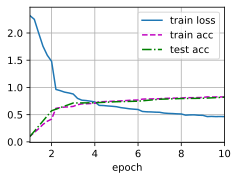

In [7]:
# 我们训练和评估LeNet-5模型。
''' 
LeNet-5
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(), # 1个输入通道,6个输出通道,填充2,保持28x28
    nn.AvgPool2d(kernel_size=2, stride=2), # 2x2的池化操作会使维数减半
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(), # 展平后接入全连接层
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(), # 16 通道 5x5 hxw
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10)) # 10个输出

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

def try_gpu(i=0):
    """Return gpu(i) if exists, otherwise return cpu().

    Defined in :numref:`sec_use_gpu`"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
'''
lr, num_epochs = 0.9, 10 
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu()) 

In [ ]:
''' 
⼩结
• 卷积神经⽹络（CNN）是⼀类使⽤卷积层的⽹络
• 在卷积神经⽹络中，我们组合使⽤卷积层、⾮线性激活函数和汇聚层
• 为了构造⾼性能的卷积神经⽹络，我们通常对卷积层进⾏排列，逐渐降低其表⽰的空间分辨率，同时增加通道数
• 在传统的卷积神经⽹络中，卷积块编码得到的表征在输出之前需由⼀个或多个全连接层进⾏处理
• LeNet是最早发布的卷积神经⽹络之⼀
'''

In [25]:
' i, epochs 从 0 开始计数,计算时需要 +1 '
for i, (X, y) in enumerate(train_iter):
    if i<2:
        print(i)


0
1
